# Hypothesis Testing Exercise

A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 
    
    Minitab File: LabTAT.mtw


In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv(r'LabTAT.csv')

# Data Exploration

In [3]:
df.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [4]:
df.tail()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87
119,182.09,215.17,221.49,162.21


In [5]:
df.sample(5)

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
48,216.39,193.28,177.76,161.42
110,172.05,174.43,211.64,152.31
5,179.45,197.00,181.51,161.12
36,185.28,173.56,199.91,133.31
118,182.40,197.18,194.52,150.87


In [6]:
df.info

<bound method DataFrame.info of      Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0          185.35        165.53        176.70        166.13
1          170.49        185.91        198.45        160.79
2          192.77        194.92        201.23        185.18
3          177.33        183.00        199.61        176.42
4          193.41        169.57        204.63        152.60
..            ...           ...           ...           ...
115        178.49        170.66        193.80        172.68
116        176.08        183.98        215.25        177.64
117        202.48        174.54        203.99        170.27
118        182.40        197.18        194.52        150.87
119        182.09        215.17        221.49        162.21

[120 rows x 4 columns]>

In [7]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


# Data Preprocessing

### Idetifying Duplicates

In [8]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [Laboratory 1, Laboratory 2, Laboratory 3, Laboratory 4]
Index: []


In [9]:
# We don't have any duplicated values present in our dataset.

### Identifying Missing Values

In [10]:
df.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [11]:
# We don't have any null values present in our dataset.

### Identifying Outliers

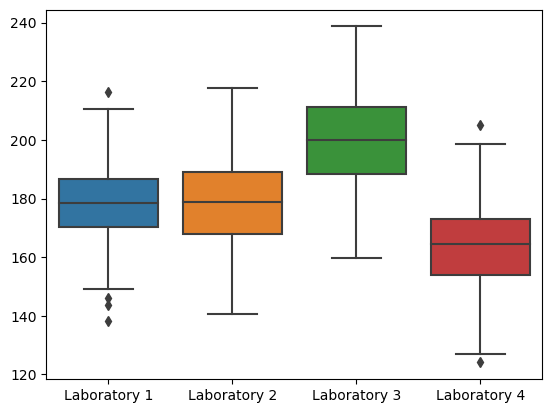

In [12]:
sns.boxplot(data=df);

Median is 178.53, lower limit is 146.03500000000003 and upper limit is 210.83499999999998


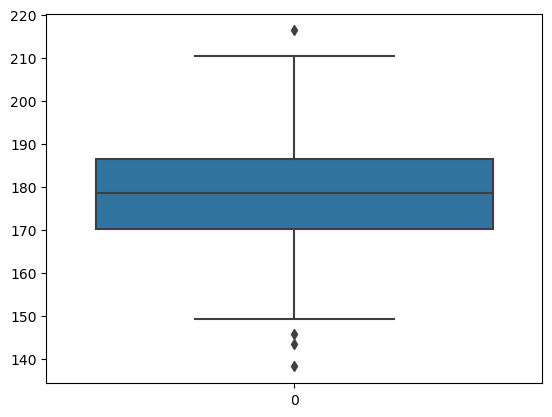

In [13]:
ser = pd.Series(df['Laboratory 1'])

q75, q50, q25 = np.percentile(ser,[75,50,25])
iqr = q75 - q25
lower_limit = q25 - 1.5*(iqr)
upper_limit = q75 + 1.5*(iqr)
median = q50

print(f"Median is {median}, lower limit is {lower_limit} and upper limit is {upper_limit}")

sns.boxplot(data=ser);

In [14]:
# In the boxplot of diameter of cutlets of Unit A, the median score is approx 6.94.
# with an interquartile range (IQR) spanning from 6.15 to 7.95. 
# There is no outliers present. The distribution is slightly positively skewed.

Median is 178.87, lower limit is 136.39375 and upper limit is 220.74375000000003


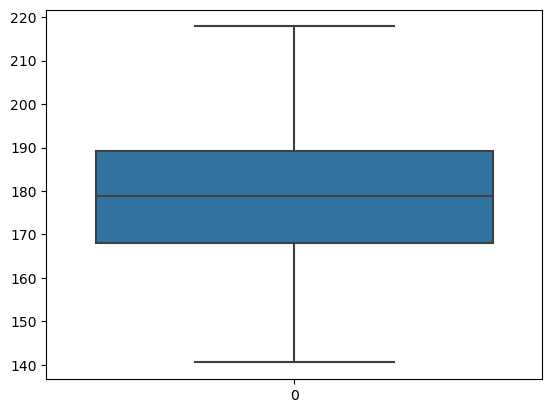

In [15]:
ser = pd.Series(df['Laboratory 2'])

q75, q50, q25 = np.percentile(ser,[75,50,25])
iqr = q75 - q25
lower_limit = q25 - 1.5*(iqr)
upper_limit = q75 + 1.5*(iqr)
median = q50

print(f"Median is {median}, lower limit is {lower_limit} and upper limit is {upper_limit}")

sns.boxplot(data=ser);

In [16]:
# In the boxplot of diameter of cutlets of Unit A, the median score is approx 6.94.
# with an interquartile range (IQR) spanning from 6.15 to 7.95. 
# There is no outliers present. The distribution is slightly positively skewed.

Median is 199.805, lower limit is 153.58249999999998 and upper limit is 245.98249999999996


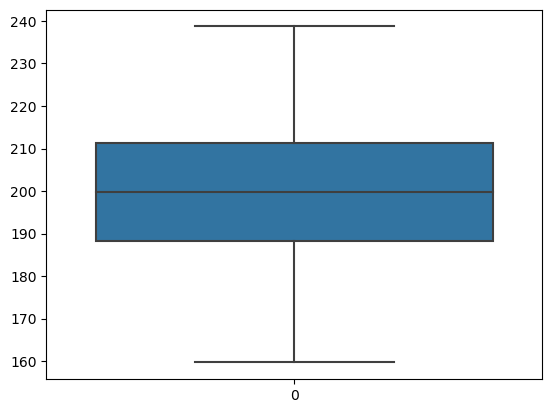

In [17]:
ser = pd.Series(df['Laboratory 3'])

q75, q50, q25 = np.percentile(ser,[75,50,25])
iqr = q75 - q25
lower_limit = q25 - 1.5*(iqr)
upper_limit = q75 + 1.5*(iqr)
median = q50

print(f"Median is {median}, lower limit is {lower_limit} and upper limit is {upper_limit}")

sns.boxplot(data=ser);

In [18]:
# In the boxplot of diameter of cutlets of Unit A, the median score is approx 6.94.
# with an interquartile range (IQR) spanning from 6.15 to 7.95. 
# There is no outliers present. The distribution is slightly positively skewed.

Median is 164.425, lower limit is 125.80125000000004 and upper limit is 201.13124999999997


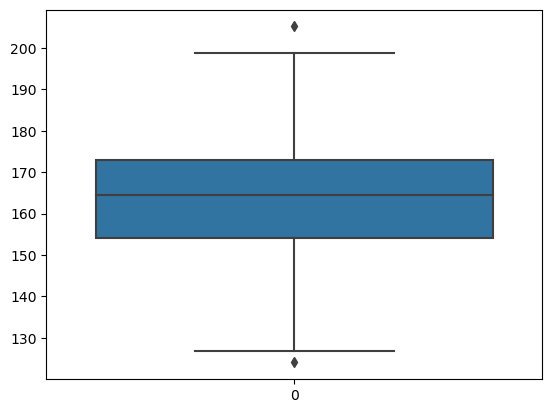

In [19]:
ser = pd.Series(df['Laboratory 4'])

q75, q50, q25 = np.percentile(ser,[75,50,25])
iqr = q75 - q25
lower_limit = q25 - 1.5*(iqr)
upper_limit = q75 + 1.5*(iqr)
median = q50

print(f"Median is {median}, lower limit is {lower_limit} and upper limit is {upper_limit}")

sns.boxplot(data=ser);

In [20]:
# In the boxplot of diameter of cutlets of Unit A, the median score is approx 6.94.
# with an interquartile range (IQR) spanning from 6.15 to 7.95. 
# There is no outliers present. The distribution is slightly positively skewed.

C:\Users\vijay\AppData\Local\Temp\ipykernel_25380\2562287418.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


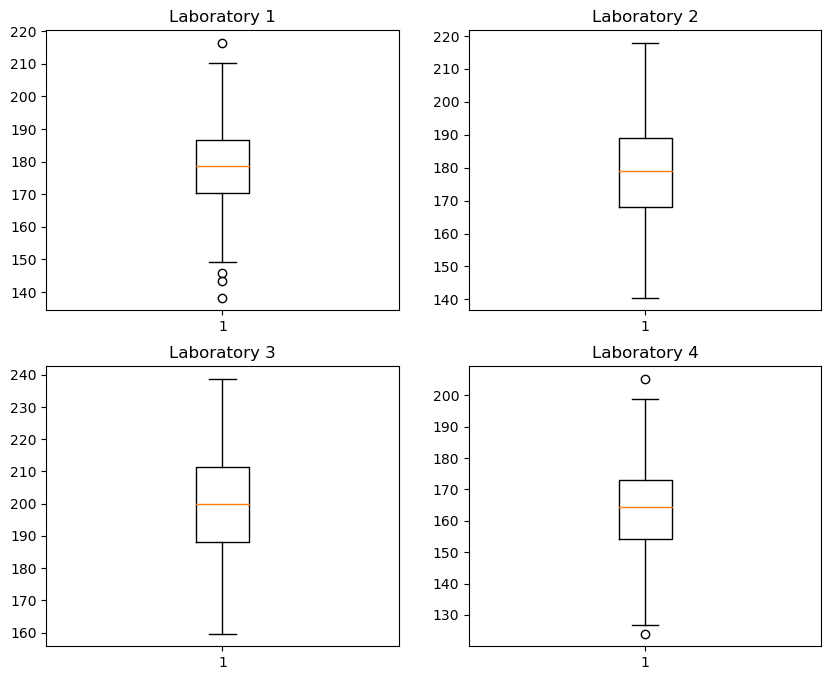

In [21]:
plt.subplots(figsize = (10,8))
plt.subplot(221)
plt.boxplot(df['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(df['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(df['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(df['Laboratory 4'])
plt.title('Laboratory 4');

C:\Users\vijay\AppData\Local\Temp\ipykernel_25380\2691253283.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


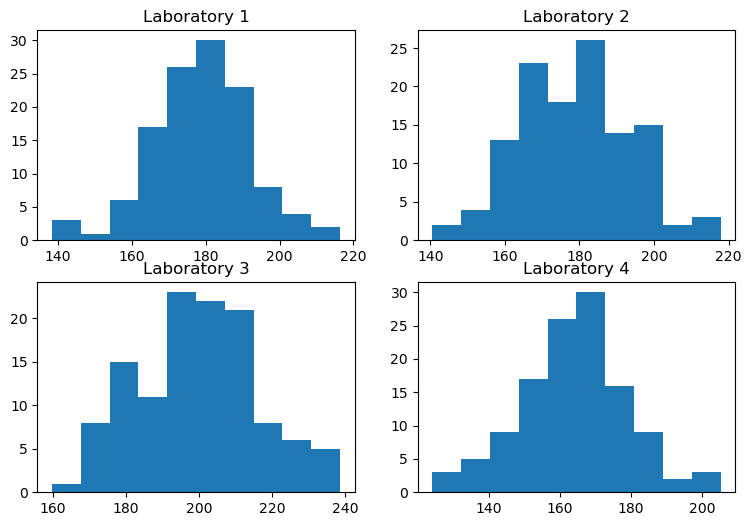

In [22]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(df['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(df['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(df['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(df['Laboratory 4'])
plt.title('Laboratory 4');

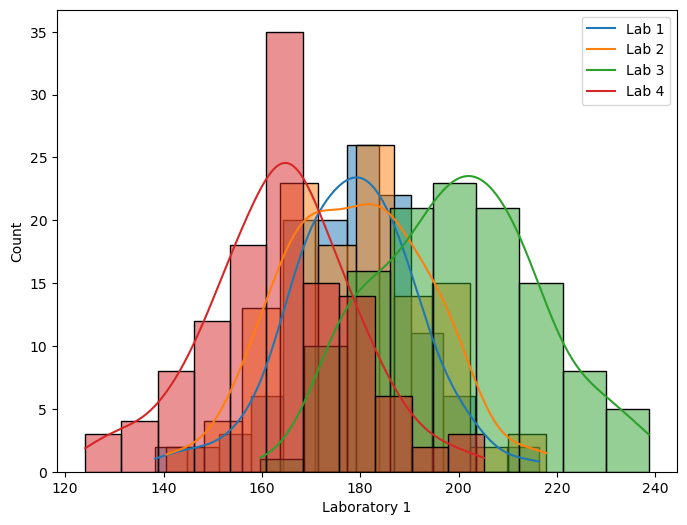

In [23]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.histplot(df['Laboratory 1'], kde = True)
sns.histplot(df['Laboratory 2'], kde = True)
sns.histplot(df['Laboratory 3'], kde = True)
sns.histplot(df['Laboratory 4'], kde = True)
plt.legend(labels);

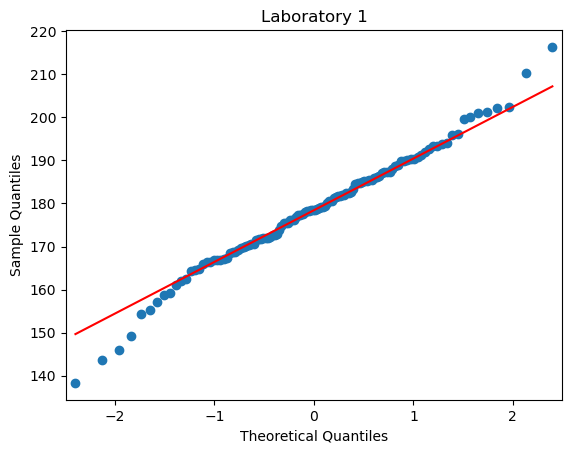

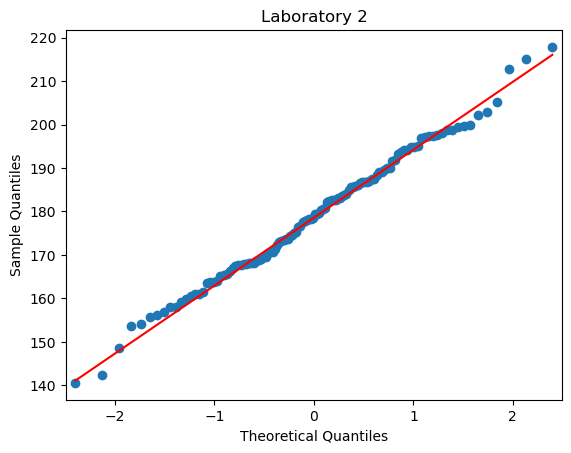

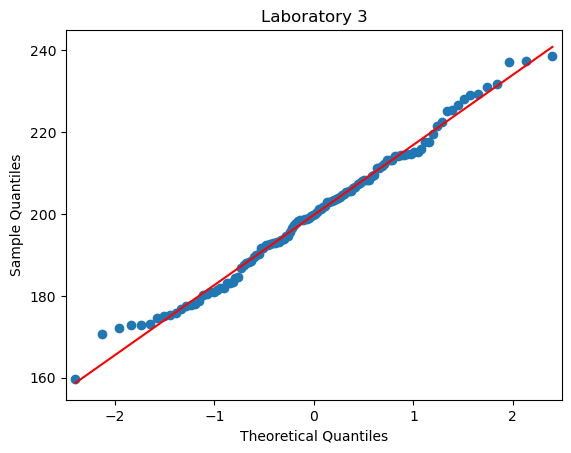

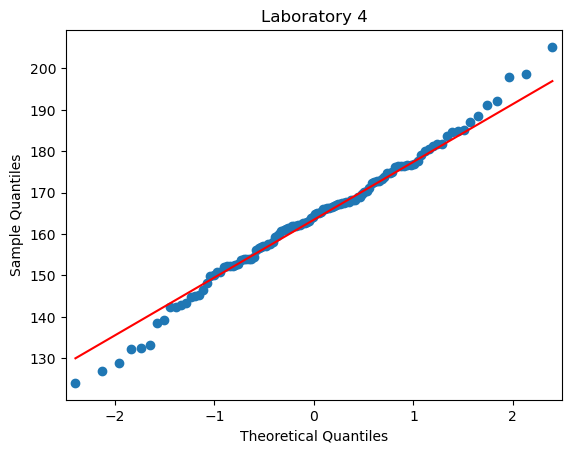

In [24]:
sm.qqplot(df['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(df['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(df['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(df['Laboratory 4'], line = 'q')
plt.title('Laboratory 4');

In [25]:
# In the Q-Q plot, most data points adhere closely to the 45-degree reference line, 
# indicating that the observed quantiles are in good agreement with the expected quantiles of a normal distribution.

# Hypothesis Testing

In [26]:
statistic, p_value = stats.f_oneway(df['Laboratory 1'], df['Laboratory 2'], df['Laboratory 3'], df['Laboratory 4'])

In [27]:
print(f"p-value for ANNOVA Test: {p_value}")
print(f"Test Statistics : {statistic}")

p-value for ANNOVA Test: 2.1156708949992414e-57
Test Statistics : 118.70421654401437


# Compare P value with Alpha

In [28]:
alpha = 0.05

if p_value < alpha:
    print('We are rejecting Null Hypothesis')
else:
    print('We are accepting Null Hypothesis')

We are rejecting Null Hypothesis


In [29]:
# Hence, we rejecting Null Hypothesis